# Bootstrapping Parameters

-------------------------


In [8]:
fit <- function(data, indices) {
  model <- glm( protests~year+month+prov+pop, data=df[indices, ], family=poisson(link = "log") )
  return(coef(model))  # Return model coefficients
}
b <- boot(df, fit, R = 1000)
c=boot.ci(b, type = "perc",index=1)
print(b)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = df, statistic = fit, R = 1000)


Bootstrap Statistics :
          original       bias    std. error
t1*  -177.86191609 11.892305868 124.1410787
t2*    -0.29867965  0.020384836   0.2267746
t3*    -0.75206270 -0.008010745   0.1713963
t4*    -0.73557301 -0.009254232   0.2286884
t5*     0.09702693 -0.008713161   0.1670190
t6*    -0.30972436 -0.001659659   0.1569955
t7*    -0.63485553  0.002428214   0.1532561
t8*    -0.33059144 -0.010454232   0.1410879
t9*    -0.05840993  0.002384971   0.1423942
t10*   -0.08093676 -0.001470351   0.1274889
t11*   -0.27109732  0.005982927   0.2237631
t12*   -0.22353591  0.005931432   0.1978651
t13*   -0.03333867  0.008021782   0.1297351
t14*   -1.36077753  0.139243904   1.3404665
t15*   13.37793293 -0.899988638   9.4720824
t16*   19.48335870 -1.342463629  13.9825796
t17*   24.17998984 -1.670280255  17.4420899
t18*   51.35224255 -3.671050664  37.5141861
t19*   16.82176032 -1.148835456  12.0681789
t20*   52.

We must make note that the $t_{k+1}$ parameter refers to the $\beta_k$ variable. Since the boot function makes this weird labeling. For example, the $\beta_0$ intercept would be equivalent to $t_1$

---------------------------

The following line of code is redundant, but if reader wishes to see *i-th* iteration of the bootstrap paramter, the columns represents the $\beta_k$ ,  $k=0,...,k$ and the rows represent the *i-th* iteration.

In [9]:
# Columns are new bootstrapped parameters, ie column 
# 1 is all new bootstrapped parameters of b0
head(b$t)  

-383.32073,-0.6772865,-0.7286088,-0.8537444,0.274507912,-0.34192715,-0.5876052,-0.16731219,-0.03735747,0.057162238,⋯,53.22984,113.25642,36.930109,115.92870,-28.783581,81.10377,-15.463518,33.081577,114.89624,25.185632
-428.91617,-0.7828183,-0.8920917,-1.0043186,0.169999926,-0.34324937,-0.5422362,-0.20375316,0.10100018,-0.005407238,⋯,59.44659,126.57881,41.315731,130.46037,-32.779724,91.16772,-17.673354,36.984590,128.90334,28.182059
-219.22411,-0.3672043,-0.7150186,-0.9567766,0.003586235,-0.25390867,-0.8342108,-0.20505036,-0.14785337,-0.087658516,⋯,29.94500,63.62967,20.825111,65.56353,-16.125219,45.97272,-8.767843,18.177823,65.12451,14.496670
-80.57537,-0.1372937,-0.7182201,-0.6246732,-0.310665416,-0.38366564,-0.7300174,-0.32270466,-0.27738714,-0.254751539,⋯,10.65015,22.65708,7.552254,22.47995,-5.106661,15.97915,-2.777641,6.424022,23.28927,5.440462
-117.78353,-0.2008654,-0.6187161,-0.8154316,0.195985497,-0.39837509,-0.6999120,-0.24330377,-0.15826700,-0.014732595,⋯,15.72006,33.10341,10.741383,34.11766,-8.212703,23.92631,-4.649530,9.257729,34.64382,7.882569
-86.07501,-0.1588256,-0.4869608,-0.6440578,0.049586994,-0.07543019,-0.2960192,-0.03973192,-0.01549436,-0.059998160,⋯,11.29945,23.38806,7.775061,24.22679,-5.847000,16.93663,-3.145373,6.699839,24.78574,5.800470


-------------------------
The following code conducts bootstrap resampling to estimate confidence intervals for the parameters. Initially, we utilize the boot.ci() function from the boot package in R to compute percentile-based bootstrap confidence intervals (type = "perc") for the first parameter (index = 1) of the model. Then, the results are stored in a list named boot_ci_list. We iterate this process over an index = i where i ranges from 1 to 26, and print the outcomes. This procedure provides us with a 95% confidence interval for each parameter, where Beta 0 represents the intercept.

In [10]:
library(cowplot)

In [11]:
library(ggplot2)

Parameter: Beta_ 0 
Bootstrap CI (95%): -424.5769 - 99.35159 

Parameter: Beta_ 1 
Bootstrap CI (95%): -0.7412705 - 0.1474053 

Parameter: Beta_ 2 
Bootstrap CI (95%): -1.100472 - -0.431664 

Parameter: Beta_ 3 
Bootstrap CI (95%): -1.198947 - -0.3446166 

Parameter: Beta_ 4 
Bootstrap CI (95%): -0.2281949 - 0.4021107 

Parameter: Beta_ 5 
Bootstrap CI (95%): -0.6010649 - -0.00342422 

Parameter: Beta_ 6 
Bootstrap CI (95%): -0.9348345 - -0.3167158 

Parameter: Beta_ 7 
Bootstrap CI (95%): -0.6447007 - -0.06723964 

Parameter: Beta_ 8 
Bootstrap CI (95%): -0.3248727 - 0.2291564 

Parameter: Beta_ 9 
Bootstrap CI (95%): -0.3228818 - 0.178325 

Parameter: Beta_ 10 
Bootstrap CI (95%): -0.7513795 - 0.1624772 

Parameter: Beta_ 11 
Bootstrap CI (95%): -0.6099544 - 0.1777668 

Parameter: Beta_ 12 
Bootstrap CI (95%): -0.269729 - 0.242004 

Parameter: Beta_ 13 
Bootstrap CI (95%): -4.072439 - 1.550148 

Parameter: Beta_ 14 
Bootstrap CI (95%): -7.644765 - 32.08168 

Parameter: Beta_ 15 
Boot

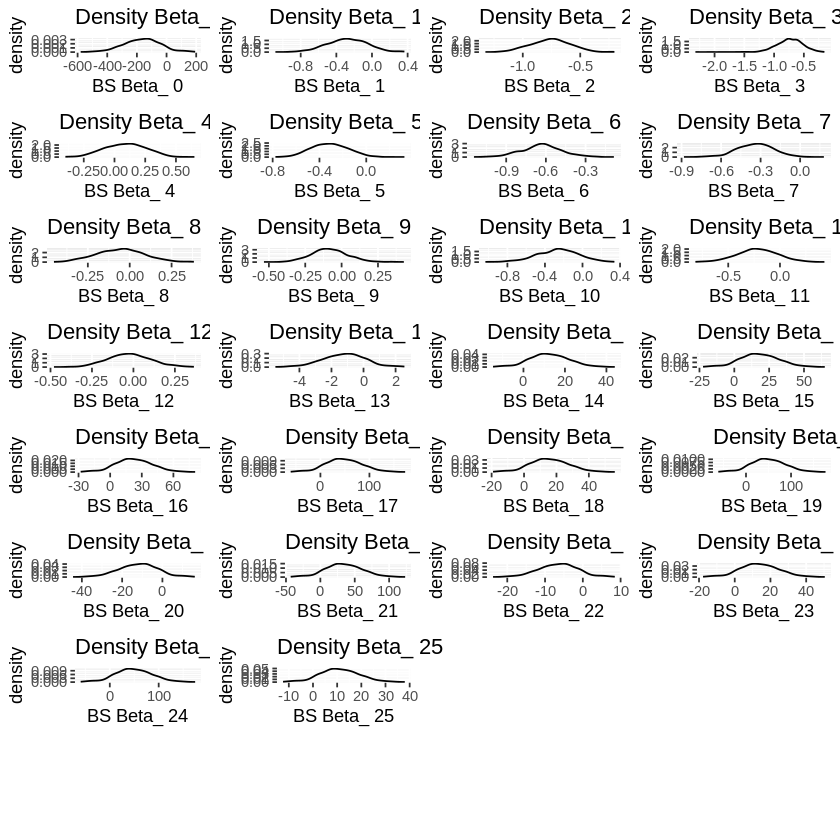

In [12]:
boot_ci <- boot.ci(b, type = "perc",index=1)

boot_ci_list <- list()
# Iterate over parameters
for (i in 1:26) {
  # Perform bootstrap confidence interval calculation for the ith parameter
  boot_ci <- boot.ci(b, type = "perc", index = i)
  # Store the result in the list
  boot_ci_list[[i]] <- boot_ci
}

# Display results for all parameters
for (i in 1:26) {
  param_name <- names(b$t)[i]
  ci_lower <- boot_ci_list[[i]]$percent[4]
  ci_upper <- boot_ci_list[[i]]$percent[5]

  cat("Parameter:", "Beta_",i-1, param_name, "\n")
  cat("Bootstrap CI (95%):", ci_lower, "-", ci_upper, "\n\n")
}

plots_list <- list()

# Iterate over each column of bootstrapped parameters
for (i in 1:ncol(b$t)) {
# Create a density plot for the current parameter
  p <- ggplot(data.frame(x = b$t[,i]), aes(x)) +
    geom_density() +
    labs(title = paste("Density Beta_", i - 1),
         x = paste("BS Beta_", i - 1))
  plots_list[[i]] <- p
}

# Arrange the plots into a matrix
plots_matrix <- plot_grid(plotlist = plots_list, nrow = 8)
plots_matrix

We can see this matrix plot of all bootstrapped parameter and see where 0 falls within the density plot to determine if its significant or not.

-----------------------------------

So according to the bootstrapped confidence interval, the parameters: $\beta_2,\beta_3,\beta_5,\beta_6,\beta_7$ are the only significant parameters which corresponds to the monthAugust, monthDecember, monthJanurary, monthJuly, monthJune, monthMarch variable. This is very different compared to what the summary Z-test has given us. 

In context to Poisson Regression, alternative methods such as quasi-Poisson (Overdispersed Poisson Regression) or Negative Binomial Regression are often employed. These methods explicitly account for overdispersion by allowing the variance to exceed the mean. In such models, the significance and interpretation of predictor variables, including the population variable, may differ from those in standard Poisson Regression due to the adjustments made to accommodate overdispersion. In the Overdispersed Poisson Regression case, we add a "dispersion" parameter $\phi>0$.  Then, our random variable $Y$ will have 
$\mathrm{E}Z = \lambda$ and $\mathrm{Var}(Y) = \phi\lambda$. Just like the bootstrap, we can see the difference in parameter significance in the code below which almost lines up with bootstrapping significant parameters.

In [13]:
# Fit overdispersed poisson regression model with chosen variables
m2 <- glm( protests~year+month+prov+pop, data=df, family=quasipoisson(link = "log") )
summary(m2)


Call:
glm(formula = protests ~ year + month + prov + pop, family = quasipoisson(link = "log"), 
    data = df)

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -177.86192  115.63769  -1.538 0.125183    
year2023                        -0.29868    0.21356  -1.399 0.163083    
monthAugust                     -0.75206    0.14996  -5.015 9.55e-07 ***
monthDecember                   -0.73557    0.20859  -3.526 0.000494 ***
monthFebruary                    0.09703    0.11775   0.824 0.410659    
monthJanuary                    -0.30972    0.13027  -2.378 0.018118 *  
monthJuly                       -0.63486    0.14528  -4.370 1.77e-05 ***
monthJune                       -0.33059    0.12423  -2.661 0.008248 ** 
monthMarch                      -0.05841    0.12209  -0.478 0.632734    
monthMay                        -0.08094    0.11597  -0.698 0.485816    
monthNovember                   -0.27110    0.17501  -1.549 0.122530  

In [14]:
# Defining year to numeric to predict 2025
df$year <- as.numeric( df$year ) # defines each category starting from 1
df$year <- df$year + 2021 # year correction

The provided code consists of two functions tailored for predicting and visualizing predicted protests using a Poisson regression model. The *predict.protests* function accepts parameters such as province, month, year, population, and the number of simulations. It proceeds by fitting a Poisson regression model, predicting the expected number of protests, generating simulated protest counts based on the predicted lambda, calculating 95% prediction bands, and presenting summary statistics. On the other hand, the plot.hist function serves a similar purpose but emphasizes plotting, generating a histogram of the simulated protest counts for a specified province, month, and year. These functions enable us to forecast future protest counts and visualize their distribution via histograms.

In [15]:
predict.protests <- function(prov, month, year, pop,nn) {
    m1 <- glm( protests ~ year + month + prov + pop, data = df, family = poisson(link = "log"))
    lmb <- predict(m1, newdata = data.frame(month = month, year = year, pop = pop, prov = prov, type = "response"))
    protest_counts <- rpois(nn, lambda = lmb)
    print(paste("-----",month,year,",",prov,"(Population:",exp(pop),")","-----"))
    
# Calculate 95% prediction bands
    lower_bound <- quantile(protest_counts, 0.025)
    upper_bound <- quantile(protest_counts, 0.975)  
    cat("Lower bound:", lower_bound, "\n")
    cat("Upper bound:", upper_bound, "\n")
    
# Check summary statistics of simulated counts
    print(summary(protest_counts))
}
plot.hist <- function(prov, month, year, pop,nn) {
    m1 <- glm( protests ~ year + month + prov + pop, data = df, family = poisson(link = "log"))
    lmb <- predict(m1, newdata = data.frame(month = month, year = year, pop = pop, prov = prov, type = "response"))
    protest_counts <- rpois(nn, lambda = lmb)
# Plot histogram of the simluated poisson
    hist(protest_counts, xlab = "Protest Counts", breaks = 30, main = paste("Simulated counts for",prov, "in" , month, year))
}

To predict protest numbers for 2025, we need to input additional variables into our model. These include the month, population, and province, though we're examining all provinces regardless. For consistency, we've chosen July, as it holds significance with Canada's birthdate. However, determining population figures required careful consideration. Large deviations from original data could skew our predictions significantly. To address this, we opted for the mean logarithm of each province's population, rounding up to the nearest whole number. This method assumes a moderate increase in population across all provinces, approximating a rise by a factor of about $\approx e^x, 0 \le x \le 1$. This ensures our predictions remain plausible, while allowing for variability in population growth.

In [16]:
# Using aggregate to find the mean population for each province
mean_population <- aggregate(pop ~ prov, data = df, FUN = mean)

# Print the result
print(mean_population)

                        prov      pop
1                    Alberta 15.33744
2           British Columbia 15.50404
3                   Manitoba 14.17198
4              New Brunswick 13.61455
5  Newfoundland and Labrador 13.18798
6      Northwest Territories 10.70852
7                Nova Scotia 13.85090
8                    Nunavut 10.60930
9                    Ontario 16.54453
10      Prince Edward Island 12.03984
11                    Quebec 15.98423
12              Saskatchewan 13.98985
13                     Yukon 10.69555


[1] "----- July 2025 , Alberta (Population: 8886110.52050787 ) -----"
Lower bound: 4 
Upper bound: 16 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   7.000   9.000   9.338  11.000  21.000 
[1] "----- July 2025 , British Columbia (Population: 8886110.52050787 ) -----"
Lower bound: 3 
Upper bound: 14 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   6.000   8.000   8.004  10.000  15.000 
[1] "----- July 2025 , Manitoba (Population: 3269017.37247211 ) -----"
Lower bound: 5 
Upper bound: 18 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    8.00   11.00   10.71   13.00   23.00 
[1] "----- July 2025 , New Brunswick (Population: 1202604.28416478 ) -----"
Lower bound: 2 
Upper bound: 10 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   4.000   5.000   5.212   6.000  15.000 
[1] "----- July 2025 , Newfoundland and Labrador (Population: 1202604.28416478 ) -----"
Lower bound: 4.475 
Upper bound: 16.525 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  

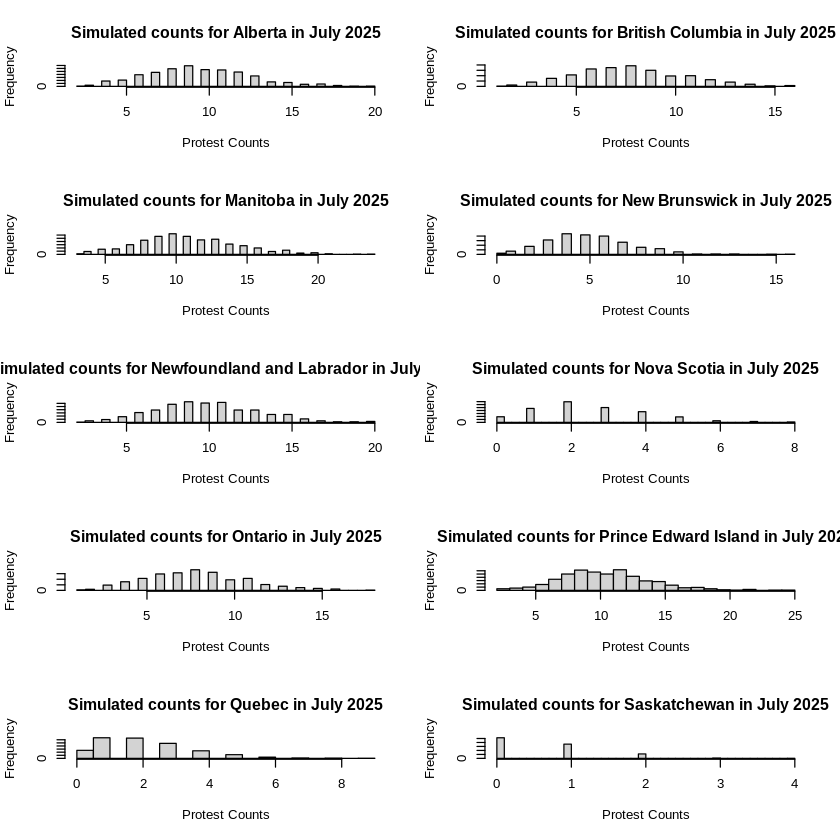

In [17]:
nn <- 500
month <- "July"
year <- 2025

# Define provinces
provinces <- c(
  "Alberta", "British Columbia", "Manitoba", "New Brunswick", "Newfoundland and Labrador",
  "Nova Scotia", "Ontario", "Prince Edward Island", "Quebec", "Saskatchewan"
)
# Define mean population relative to provinces
populations <- c(16, 16, 15, 14, 14, 14, 17, 13, 16, 14)

# Set up bounds and summary of monte carlo
for (i in seq_along(provinces)) {
  predict.protests(prov = provinces[i], month, year, pop = populations[i], nn)
}

print("---------Histograms---------")

# Set up a matrix of plots
par(mfrow = c(5,2))
for (i in seq_along(provinces)) {
  plot.hist(prov = provinces[i], month, year, pop = populations[i], nn)
}

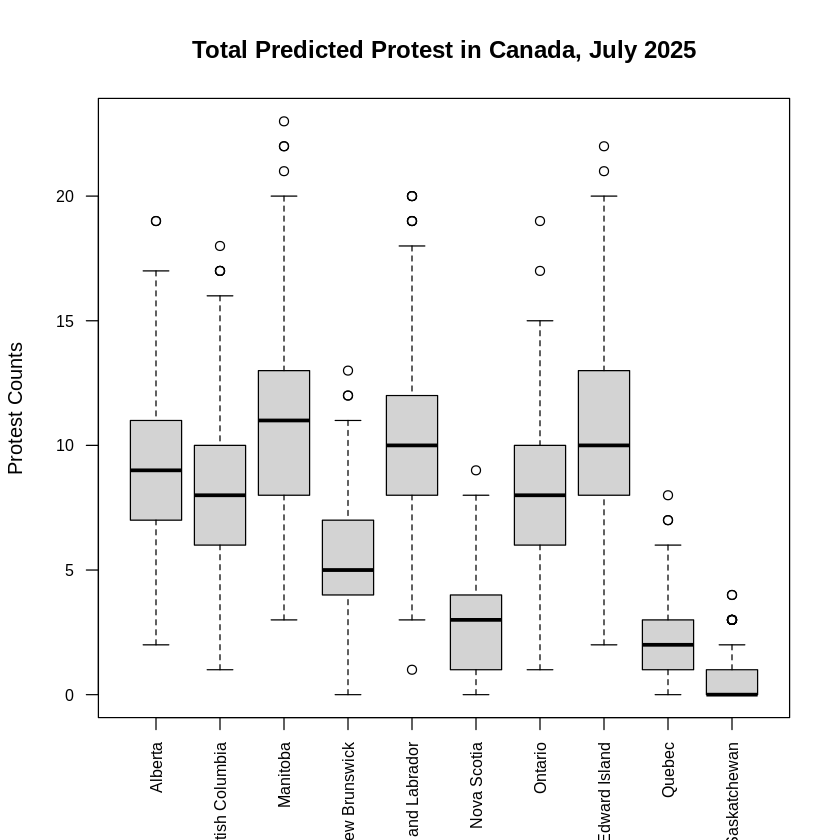

In [27]:
# Create a list to store simulated protest counts for each province
protest_data <- list()

# Simulate protest counts for each province
for (i in seq_along(provinces)) {
  m1 <- glm(protests ~ year + month + prov + pop, data = df, family = poisson(link = "log"))
  lmb <- predict(m1, newdata = data.frame(month = month, year = year, pop = populations[i], prov = provinces[i], type = "response"))
  protest_counts <- rpois(nn, lambda = lmb)
  protest_data[[provinces[i]]] <- protest_counts
}

# Convert the list to a data frame
protest_df <- data.frame(province = rep(provinces, each = nn),
                          protest_counts = unlist(protest_data))

# Create the boxplot
boxplot(protest_counts ~ province, data = protest_df,
        xlab = "", ylab = "Protest Counts",
        main = "Total Predicted Protest in Canada, July 2025",
        cex.axis = 0.8, # Adjust the size of the axis labels
        las = 2)       # Rotate labels by 45 degrees

Based on the summary of findings for the predicted protests in July 2025, each province seems to have varying levels of predicted protest activity. Here's a breakdown of the observations:

- Alberta: Predicted protests range from 4 to 16, with a mean of approximately 9.3.
- British Columbia: Predicted protests range from 3 to 14, with a mean of around 8.
- Manitoba: Predicted protests range from 5 to 18, with a mean close to 10.7.
- New Brunswick: Predicted protests range from 2 to 10, with a mean of about 5.2.
- Newfoundland and Labrador: Predicted protests range from approximately 4.5 to 16.5, with a mean close to 9.9.
- Nova Scotia: Predicted protests range from 0 to 6, with a mean of about 2.6.
- Ontario: Predicted protests range from 3 to 14, with a mean close to 8.
- Prince Edward Island: Predicted protests range from 5 to 17, with a mean close to 10.8.
- Quebec: Predicted protests range from 0 to 6, with a mean of approximately 2.3.
- Saskatchewan: Predicted protests range from 0 to 3, with a mean around 0.6.


From these results, it's evident that certain provinces, such as Manitoba and Prince Edward Island, exhibit higher predicted protest counts compared to others like Nova Scotia and Saskatchewan. The predicted protest counts vary based on factors such as population size, historical data trends, and possibly other unobserved variables specific to each province. These insights could be valuable for understanding and potentially addressing social or political tensions across different regions of Canada.

As a final point, we have seen that Monte Carlo sampling helps us understand how certain or uncertain our predictions are by trying out lots of different scenarios. This helps us see how our data and our model might vary. We use it to figure out a range where we think the actual values might fall, like the 95% bounds we calculated. But there are some things to watch out for. First, our predictions are only as good as the data we used to make them. If our data isn't very good, our predictions might not be either. Second, the assumptions we make when using our model might not always be true in real life. For example, we might assume that certain things are related in a certain way, but that might not be the case. Finally, Monte Carlo sampling assumes that we know all the details of our model perfectly, which might not be true in practice. So, while it's a useful tool, we need to be careful when interpreting the results and remember the limitations of both our model and our data. One of these assumptions is that the variation in our data is consistent across all levels of our predictors, which is called equidispersion. However, this might not always hold true in real-world situations.Additionally, incorporating cross-validation techniques can enhance the reliability and generalizability of the predictions in this project. Cross-validation involves splitting the dataset into multiple subsets, training the model on a portion of the data, and then evaluating its performance on the remaining unseen data. This process helps assess how well the model performs on new data and can provide insights into its robustness and potential for overfitting.

This research process has been both rewarding and insightful. Through the application of statistical techniques and data analysis, we have gained valuable insights into the dynamics of protest activity in Canada, laying the groundwork for further exploration and refinement of predictive models in this domain. Moving forward, continued efforts to improve model accuracy and robustness will be essential for enhancing the utility of such predictions in informing decision-making and policy development. Overall, our study underscores the complexity of modeling social phenomena like protests, while also highlighting the potential benefits of employing rigorous statistical methods to better understand and anticipate these dynamics.